# Import Data

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# import io

# print(uploaded.keys())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# data = pd.read_csv(io.BytesIO(uploaded['']))
# data = pd.read_csv("/content/drive/MyDrive/VLSIDC/IMU.csv")
#data = pd.read_csv("/content/drive/MyDrive/Personal/IMU.csv")
data = pd.read_csv("/content/drive/MyDrive/Gait_phase_anslysis_DH803/IMU.csv")
# Print the data
data

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
0,1,-0.00,0,-0.039700,-0.004727,-0.990824,-0.063587,0.024498,-0.039947,0.0,...,0.0,0.0,0.0,-0.000661,-0.003022,-0.008331,0.0,0.0,0.0,0.0
1,1,0.01,1,-0.040587,-0.004512,-0.989232,-0.047073,-0.078714,0.011132,0.0,...,0.0,0.0,0.0,0.000197,-0.002830,-0.009925,0.0,0.0,0.0,0.0
2,1,0.02,2,-0.042102,-0.005454,-0.987952,0.008425,0.057533,0.012059,0.0,...,0.0,0.0,0.0,0.001710,-0.001890,-0.011205,0.0,0.0,0.0,0.0
3,1,0.03,3,-0.042447,-0.006026,-0.988598,0.060819,-0.079942,0.027296,0.0,...,0.0,0.0,0.0,0.002043,-0.001322,-0.010559,0.0,0.0,0.0,0.0
4,1,0.04,4,-0.041048,-0.007084,-0.992796,0.116074,0.324893,-0.038604,0.0,...,0.0,0.0,0.0,0.000681,-0.000277,-0.006361,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27639,1,276.39,27639,0.015738,-0.963585,0.269783,0.170229,-0.093807,0.208440,0.0,...,0.0,0.0,0.0,0.003108,0.000362,-0.001743,0.0,0.0,0.0,0.0
27640,1,276.40,27640,0.014085,-0.963137,0.270670,0.117523,-0.041089,0.104711,0.0,...,0.0,0.0,0.0,0.004574,-0.000069,-0.002553,0.0,0.0,0.0,0.0
27641,1,276.41,27641,0.015328,-0.961976,0.272607,-0.040221,0.252528,-0.047389,0.0,...,0.0,0.0,0.0,0.002844,-0.001194,-0.004328,0.0,0.0,0.0,0.0
27642,1,276.42,27642,0.015893,-0.963466,0.269937,0.072513,0.729614,0.026853,0.0,...,0.0,0.0,0.0,0.002248,0.000297,-0.001654,0.0,0.0,0.0,0.0


In [ ]:
# accXRaw = data[' AccX (g)']
accYRaw = data[' AccY (g)']
accXRaw = data[' AccX (g)']
# accZRaw = data[' AccZ (g)']
tRaw = data[' TimeStamp (s)']
fs = 100

In [ ]:
rows, cols = (5, 150)
import numpy as np
accY = np.asarray([[0]*cols]*rows, dtype='float')
accX = np.asarray([[0]*cols]*rows, dtype='float')
t = np.asarray([[0]*cols]*rows, dtype='float')
print((accY).shape)

for i in range(5):
    start, end = 15000 + i*100, 15150 + i*100
    accY[i] = accYRaw[start: end]
    accX[i] = accXRaw[start: end]
    t[i] = tRaw[start: end]

(5, 150)


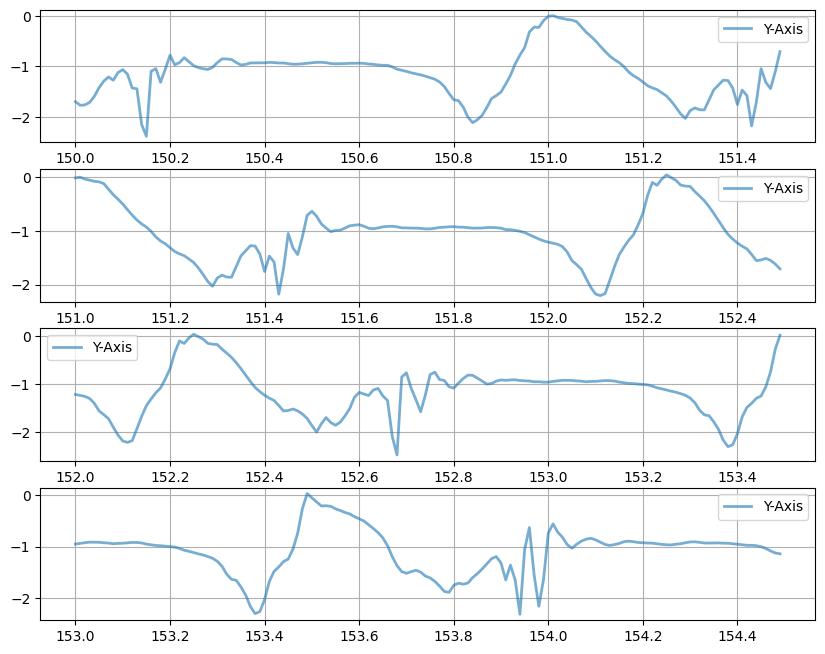

In [ ]:
# Plotting the signals
import matplotlib.pyplot as plt
font_size = 11
plt.figure(figsize=(10, 10))
for i in range(1, 5):
  plt.subplot(5, 1, i)
  plt.plot(t[i-1], accY[i-1], label='Y-Axis', alpha=0.6, linewidth=2)
  #plt.title('Raw Data', fontsize = font_size)
  plt.grid(True)
  plt.legend()

# Pre-processing

In [ ]:
import numpy as np
from scipy import signal
from scipy.stats import pearsonr

def apply_lowpass_filters(data, sampling_frequency, cutoff_frequency, filter_types, filter_order=4):
    """
    Apply multiple lowpass filters (including moving average) to the input data and calculate correlation coefficients.

    Parameters:
    - data (array-like): The input data to filter.
    - sampling_frequency (float): The sampling frequency of the input data (in Hz).
    - cutoff_frequency (float): The cutoff frequency of the lowpass filters (in Hz).
    - filter_types (list of str): A list of filter types to use ('butterworth', 'chebyshev1', 'chebyshev2', 'moving_average').
    - filter_order (int): The order of the filters (only applicable to certain filter types).

    Returns:
    - results (dict): A dictionary containing filtered data and correlation coefficients for each filter type.
    """
    nyquist_frequency = 0.5 * sampling_frequency
    results = {}

    for filter_type in filter_types:
        if filter_type == 'butterworth':
            b, a = signal.butter(filter_order, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev1':
            b, a = signal.cheby1(filter_order, 1, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev2':
            b, a = signal.cheby2(filter_order, 30, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'moving_average':
            filter_window = int(sampling_frequency / cutoff_frequency)  # Window size for moving average
            filtered_data = np.convolve(data, np.ones(filter_window) / filter_window, mode='same')
        else:
            raise ValueError("Invalid filter_type. Supported types: 'butterworth', 'chebyshev1', 'chebyshev2', 'moving_average'")

        correlation_coefficient, _ = pearsonr(data, filtered_data)

        results[filter_type] = {
            'filtered_data': filtered_data,
            'correlation_coefficient': correlation_coefficient
        }

    return results

accY

Butterworth Filter Correlation Coefficient: 0.9710
Chebyshev1 Filter Correlation Coefficient: 0.9734


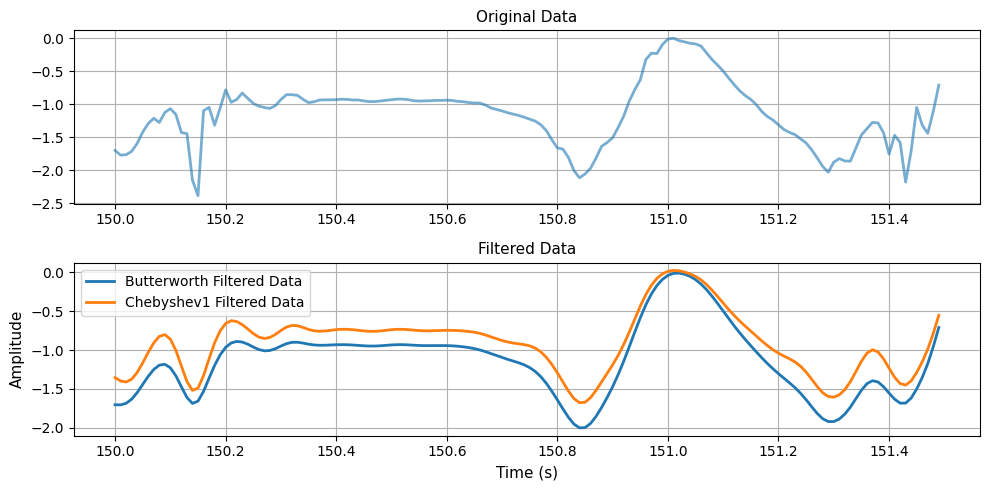

In [ ]:
# Apply multiple lowpass filters and calculate correlation coefficients
cutoff_frequency = 10  # Hz
# filter_types = ['butterworth', 'chebyshev1', 'chebyshev2', 'moving_average']
filter_types = ['butterworth', 'chebyshev1']
results = apply_lowpass_filters(accY[0], fs, cutoff_frequency, filter_types, 2)

# Print correlation coefficients for each filter type
for filter_type, result in results.items():
    correlation_coefficient = result['correlation_coefficient']
    print(f'{filter_type.capitalize()} Filter Correlation Coefficient: {correlation_coefficient:.4f}')

font_size = 11
# Plot the original and filtered data for each filter type
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t[0], accY[0], label='Original Data', alpha=0.6, linewidth=2)
plt.title('Original Data', fontsize = font_size)
plt.grid(True)

plt.subplot(2, 1, 2)
for filter_type, result in results.items():
    filtered_data = result['filtered_data']
    plt.plot(t[0], filtered_data, label=f'{filter_type.capitalize()} Filtered Data', linewidth=2)

plt.title('Filtered Data', fontsize = font_size)
plt.xlabel('Time (s)', fontsize = font_size)
plt.ylabel('Amplitude', fontsize = font_size)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
###not useful
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np


data = pd.DataFrame({'timestamp': t[0], 'measured_value': filtered_data})

# Extract the measured values for clustering
X = data['measured_value'].values.reshape(-1, 1)

# Define the number of clusters (you may need to adjust this based on your data)
num_clusters = 2

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Plot the data with clusters
plt.scatter(data['timestamp'], data['measured_value'], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering for Gait Cycle Phases')
plt.xlabel('Timestamp')
plt.ylabel('Measured Value')
plt.show()

# Analyze cluster centers to determine stance and swing phases
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_centers = np.argsort(cluster_centers)
stance_cluster = sorted_centers[0]
swing_cluster = sorted_centers[1]

# Assign labels based on cluster centers
data['phase'] = np.where(data['cluster'] == stance_cluster, 'Stance', 'Swing')

# Print the resulting DataFrame with labels
print(data[['timestamp', 'measured_value', 'phase']])

accx

Butterworth Filter Correlation Coefficient: 0.7929
Chebyshev1 Filter Correlation Coefficient: 0.8219


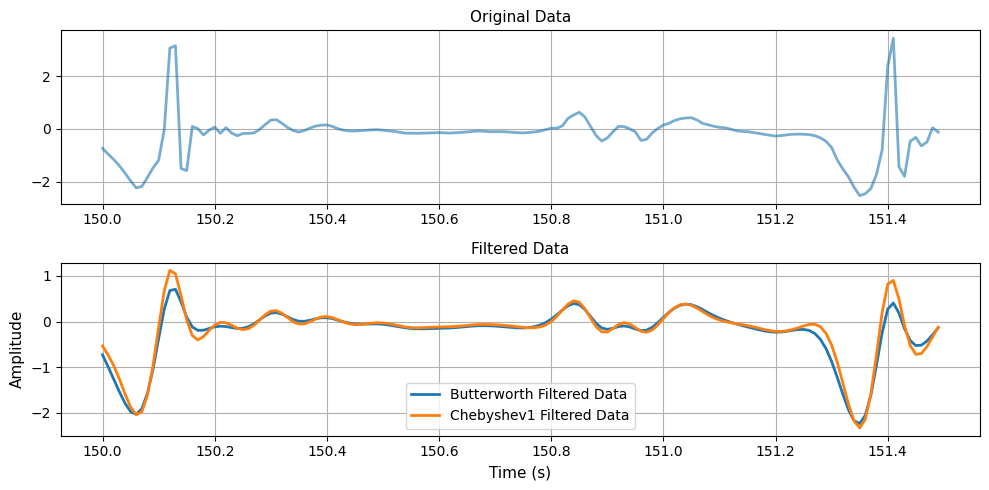

In [ ]:
# Apply multiple lowpass filters and calculate correlation coefficients
cutoff_frequency = 10  # Hz
# filter_types = ['butterworth', 'chebyshev1', 'chebyshev2', 'moving_average']
filter_types = ['butterworth', 'chebyshev1']
results = apply_lowpass_filters(accX[0], fs, cutoff_frequency, filter_types, 2)

# Print correlation coefficients for each filter type
for filter_type, result in results.items():
    correlation_coefficient = result['correlation_coefficient']
    print(f'{filter_type.capitalize()} Filter Correlation Coefficient: {correlation_coefficient:.4f}')

font_size = 11
# Plot the original and filtered data for each filter type
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t[0], accX[0], label='Original Data', alpha=0.6, linewidth=2)
plt.title('Original Data', fontsize = font_size)
plt.grid(True)

plt.subplot(2, 1, 2)
for filter_type, result in results.items():
    filtered_data1 = result['filtered_data']
    plt.plot(t[0], filtered_data1, label=f'{filter_type.capitalize()} Filtered Data', linewidth=2)

plt.title('Filtered Data', fontsize = font_size)
plt.xlabel('Time (s)', fontsize = font_size)
plt.ylabel('Amplitude', fontsize = font_size)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


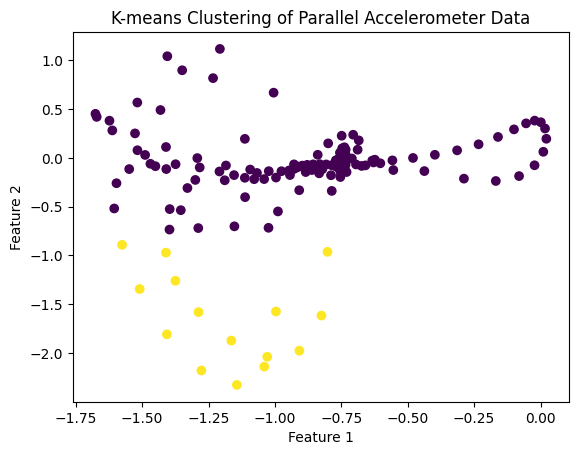

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming filtered_data and filtered_data1 are your preprocessed accelerometer data arrays
data1 = filtered_data
data2 = filtered_data1

# Assuming data1 and data2 have the same number of samples
data = np.column_stack((data1, data2))

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering of Parallel Accelerometer Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Feature Extraction

In [ ]:
!pip install tsfresh

In [ ]:
import tsfresh
time_series = np.array(t[0])
df_filtered_data = pd.DataFrame(time_series, columns = ['Time'])
df_filtered_data["Accel"] = filtered_data
df_filtered_data

# df_features = tsfresh.extract_features(df_filtered_data, column_id='Accel', column_value="Accel", column_sort='Time', default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
df_features = tsfresh.extract_features(df_filtered_data, column_id='Accel', column_value="Accel", column_sort='Time')
# # df_features.columns
df_features

NameError: ignored

In [ ]:
df = df_features
df.shape

(150, 783)

In [ ]:
df = df.dropna(axis='columns')
df.shape

(150, 218)

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(150, 47)

# k-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 5 5 0 4 0 5 2 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0
 0 0 0 5 2 2 2 5 0 4 1 3 3 3 3 3 3 3 1 1 4 4 0 0 0 5 5 2 2 2 5 0 0 5 5 5 0
 4]


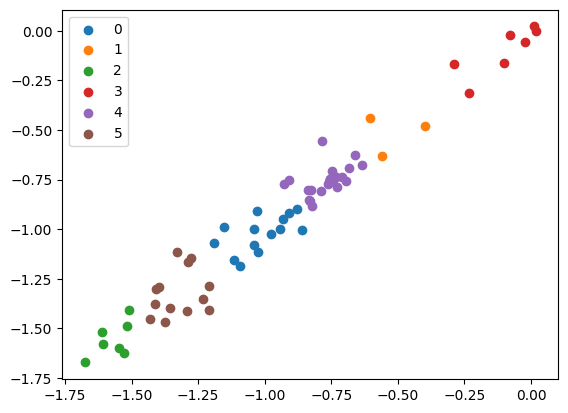

In [ ]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

data = df_filtered_data["Accel"]

data = data.values.reshape(-1, 2)
# Reducing the dataset
pca = PCA()  # No need to specify n_components here
reduced_data = pca.fit_transform(data)
# Reshaping the dataset

#Initialize the class object
kmeans = KMeans(n_clusters= 6)

#predict the labels of clusters.
label = kmeans.fit_predict(data)
print(label)

#Getting unique labels
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.utils import to_categorical
from keras.models import load_model



# Step 1: Data Preprocessing
# Assuming that you have labeled data with a 'label' column
data.dropna(subset=['label'], inplace=True)  # Remove rows with missing labels
labels = data['label']
features = data.drop(columns=['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 2: Create and Configure the RNN Model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Step 3: Train the RNN Model
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = to_categorical(y_train)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Step 4: Save the Model
model.save('gait_trained.h5')

# Loading the Saved Model for Predictions
loaded_model = load_model('gait_trained.h5')

# Prepare new_data for prediction, making sure it matches the format of the original data
# Example: new_data should be a NumPy array of shape (num_samples, num_features, 1)
new_data = np.array(new_data).reshape(new_data.shape[0], new_data.shape[1], 1)

# Make predictions using the loaded model
new_predictions = loaded_model.predict(new_data)




# do not touch

In [ ]:
import numpy as np
from scipy import signal
from scipy.stats import pearsonr

def apply_lowpass_filters(data, sampling_frequency, cutoff_frequency, filter_types, filter_order=4):
    """
    Apply multiple lowpass filters (including moving average) to the input data and calculate correlation coefficients.

    Parameters:
    - data (array-like): The input data to filter.
    - sampling_frequency (float): The sampling frequency of the input data (in Hz).
    - cutoff_frequency (float): The cutoff frequency of the lowpass filters (in Hz).
    - filter_types (list of str): A list of filter types to use ('butterworth', 'chebyshev1', 'chebyshev2', 'moving_average').
    - filter_order (int): The order of the filters (only applicable to certain filter types).

    Returns:
    - results (dict): A dictionary containing filtered data and correlation coefficients for each filter type.
    """
    nyquist_frequency = 0.5 * sampling_frequency
    results = {}

    for filter_type in filter_types:
        if filter_type == 'butterworth':
            b, a = signal.butter(filter_order, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev1':
            b, a = signal.cheby1(filter_order, 1, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev2':
            b, a = signal.cheby2(filter_order, 30, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'moving_average':
            filter_window = int(sampling_frequency / cutoff_frequency)  # Window size for moving average
            filtered_data = np.convolve(data, np.ones(filter_window) / filter_window, mode='same')
        else:
            raise ValueError("Invalid filter_type. Supported types: 'butterworth', 'chebyshev1', 'chebyshev2', 'moving_average'")

        correlation_coefficient, _ = pearsonr(data, filtered_data)

        results[filter_type] = {
            'filtered_data': filtered_data,
            'correlation_coefficient': correlation_coefficient
        }

    return results

In [ ]:
import numpy as np
from scipy import signal
from scipy.stats import pearsonr

def apply_lowpass_filters(data, sampling_frequency, cutoff_frequency, filter_types, filter_order=4):
    """
    Apply multiple lowpass filters (including moving average) to the input data and calculate correlation coefficients.

    Parameters:
    - data (array-like): The input data to filter.
    - sampling_frequency (float): The sampling frequency of the input data (in Hz).
    - cutoff_frequency (float): The cutoff frequency of the lowpass filters (in Hz).
    - filter_types (list of str): A list of filter types to use ('butterworth', 'chebyshev1', 'chebyshev2', 'moving_average').
    - filter_order (int): The order of the filters (only applicable to certain filter types).

    Returns:
    - results (dict): A dictionary containing filtered data and correlation coefficients for each filter type.
    """
    nyquist_frequency = 0.5 * sampling_frequency
    results = {}

    for filter_type in filter_types:
        if filter_type == 'butterworth':
            b, a = signal.butter(filter_order, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev1':
            b, a = signal.cheby1(filter_order, 1, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'chebyshev2':
            b, a = signal.cheby2(filter_order, 30, cutoff_frequency / nyquist_frequency, btype='low')
            filtered_data = signal.filtfilt(b, a, data)
        elif filter_type == 'moving_average':
            filter_window = int(sampling_frequency / cutoff_frequency)  # Window size for moving average
            filtered_data = np.convolve(data, np.ones(filter_window) / filter_window, mode='same')
        else:
            raise ValueError("Invalid filter_type. Supported types: 'butterworth', 'chebyshev1', 'chebyshev2', 'moving_average'")

        correlation_coefficient, _ = pearsonr(data, filtered_data)

        results[filter_type] = {
            'filtered_data': filtered_data,
            'correlation_coefficient': correlation_coefficient
        }

    return results
    import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
rows, cols = (5, 150)
t = np.asarray([[0]*cols]*rows, dtype='float')
time_series = np.array(t[0])
df_filtered_data = pd.DataFrame(time_series, columns = ['Time'])
df_filtered_data["Accel"] = filtered_data
data = df_filtered_data["Accel"]
k = 2

# Reshaping the dataset
data = data.values.reshape(-1, 1)

kmeans_cluster = KMeans(init="k-means++",
                        n_clusters=k,
                        n_init=10,
                        random_state=0)

# Reducing the dataset
pca = PCA()  # No need to specify n_components here
reduced_data = pca.fit_transform(data)
kmeans_cluster.fit(reduced_data)

label = kmeans_cluster.fit_predict(df)
print(label)



NameError: ignored

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np


data = pd.DataFrame({'timestamp': t[0], 'measured_value': filtered_data})

# Extract the measured values for clustering
X = data['measured_value'].values.reshape(-1, 1)

# Define the number of clusters (you may need to adjust this based on your data)
num_clusters = 2

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Plot the data with clusters
plt.scatter(data['timestamp'], data['measured_value'], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering for Gait Cycle Phases')
plt.xlabel('Timestamp')
plt.ylabel('Measured Value')
plt.show()

# Analyze cluster centers to determine stance and swing phases
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_centers = np.argsort(cluster_centers)
stance_cluster = sorted_centers[0]
swing_cluster = sorted_centers[1]

# Assign labels based on cluster centers
data['phase'] = np.where(data['cluster'] == stance_cluster, 'Stance', 'Swing')

# Print the resulting DataFrame with labels
print("X")
print(data[['timestamp', 'measured_value', 'phase']])



